In [31]:
from typing import List 
import random 
import numpy as np 
import pandas as pd
import glob 
from nltk import tokenize, download 
import string 
import time 
from collections import Counter 
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk
from nltk.stem.porter import PorterStemmer

download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
def split_text(filepath: str, min_char: int = 5) -> List[str]:
    
    text = str()
    with open(filepath, 'r', encoding='utf8') as file:
        
        # this seperates by line 
        text = file.read().replace('\n', '. ')
        
        # this replace multiple characters 
        text = text.replace('.”', '”.').replace('."', '".').replace('?”', '”?').replace('!”', '”!')
        text = text.replace('--', ' ').replace('. . .', '').replace('_', '')
    
    sentences = tokenize.sent_tokenize(text)    
    sentences = [sentence for sentence in sentences if len(sentence) >= min_char]

    return list(sentences)

In [33]:
# reading the files 

phantomoftheopera = []

for path_1 in glob.glob('../input/gothic-literature/phantomoftheopera.txt'):
    phantomoftheopera += split_text(path_1)  
    
    
doriangray = []
for path_2 in glob.glob('../input/gothic-literature/doriangray.txt'):
    doriangray += split_text(path_2)
    
    
    
castleofotranto = []
for path_3 in glob.glob('../input/gothic-literature/castleofotranto.txt'):
    castleofotranto += split_text(path_3)
    

wutheringheights = []
for path_4 in glob.glob('../input/gothic-literature/wutheringheights.txt'):
    wutheringheights += split_text(path_4)
    
    

In [34]:
text_dictionary = {'phantom_of_the_opera' :  phantomoftheopera , 'dorian_gray': doriangray ,'castle_of_otranto': castleofotranto, 'wuthering_heights':wutheringheights }

for key in text_dictionary.keys(): 
    
    print(key, ':', len(text_dictionary[key]), 'sentences')
    

phantom_of_the_opera : 10747 sentences
dorian_gray : 10881 sentences
castle_of_otranto : 4516 sentences
wuthering_heights : 13750 sentences


In [35]:
# mixing the sentences 
np.random.seed(1) 

max_len = 10_0000 

names = [phantomoftheopera, doriangray, castleofotranto, wutheringheights] 

combined = []

for name in names: 
    name = np.random.choice(name, max_len, replace= True) 
    combined += list(name) 
    
print('Length of combo and internally shuffled list:', len(combined))    
    

Length of combo and internally shuffled list: 400000


In [36]:
# this creates a marked list 
# At this point, we want to indicate the label of the authors 
labels = ['Andrew Lloyd Webber'] * max_len + ['Oscar Wilde'] * max_len + ['Horace Walpole'] * max_len  + ['Emily Brontë'] * max_len


print('Lnegth of marked list:', len(labels))


Lnegth of marked list: 400000


In [37]:
# lets see if every sentence has a label 
len(combined) == len(labels)

True

In [38]:
# here we shuffle the data - sentences 
random.seed(3) 

zipped = list(zip(combined, labels))

random.shuffle(zipped)

combined, labels = zip(*zipped)

In [39]:
# exporting the resulting dataset 
output_data = pd.DataFrame()
output_data['text'] = combined
output_data['author'] = labels

In [40]:
print(output_data.head())
print(output_data.tail())

                                                text          author
0  “My gracious Lord,” said Jaquez, “if it please...  Horace Walpole
1                                  'Get off wi' ye!'    Emily Brontë
2  obscure apology, and an entreaty for kind reme...    Emily Brontë
3                                   I beg you will,.    Emily Brontë
4       He had seen grotesque children huddled upon.     Oscar Wilde
                                                     text               author
399995  and as soon as I had got rid of the intolerabl...          Oscar Wilde
399996  hearts that they flung to and fro, they had to...  Andrew Lloyd Webber
399997  unnecessarily and rashly to my father’s resent...       Horace Walpole
399998         that there is no happiness in the world!'.         Emily Brontë
399999                     You know her curiously shrill.          Oscar Wilde


In [41]:
output_data.to_csv('author_data.csv', index=False)
data = pd.read_csv('author_data.csv', encoding='utf8')
data.head()

,text,author
0,"“My gracious Lord,” said Jaquez, “if it please...",Horace Walpole
1,'Get off wi' ye!',Emily Brontë
2,"obscure apology, and an entreaty for kind reme...",Emily Brontë
3,"I beg you will,.",Emily Brontë
4,He had seen grotesque children huddled upon.,Oscar Wilde


In [42]:
# Label encoding the values 
data_label_encoded = pd.DataFrame() 
data_label_encoded = data.copy(deep=True)

from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
data_label_encoded['author'] = label_encoder.fit_transform(data_label_encoded['author'])
data_label_encoded.head()

,text,author
0,"“My gracious Lord,” said Jaquez, “if it please...",2
1,'Get off wi' ye!',1
2,"obscure apology, and an entreaty for kind reme...",1
3,"I beg you will,.",1
4,He had seen grotesque children huddled upon.,3


In [43]:
text = list(data['text'].values)
author = list(data['author'].values) 

print('Dataset contains {} notes.'.format(len(text)))

Dataset contains 400000 notes.


In [44]:
# data explorations 
authors = Counter(author) 
authors

Counter({'Horace Walpole': 100000,
         'Emily Brontë': 100000,
         'Oscar Wilde': 100000,
         'Andrew Lloyd Webber': 100000})

In [45]:
#some sentences 
np.random.seed(73)
n = len(text) 

for _ in range(5): 
    print(text[np.random.randint(0, n)])

She rose in her turn, put her two trembling arms round the young man's.
myself directly!
sufficient sustenance for him.. .
At that moment, we distinctly heard these words above our heads:.
because I swear at him.'.


In [46]:
# finding the word count - character count - average length 
word_count = np.array([len(sent.split()) for sent in text])
char_count = np.array([len(sent) for sent in text])
average_length = char_count / word_count 


In [47]:
# median and percentile  - min and max 
# what does the percentile mean here? 

def get_stats(var): 
    print('\t Min: ', np,min(var))
    print('\t Mmax: ', np.max(var)) 
    print('\t Average: ', np.mean(var)) 
    print('\t Median: ', np.median(var))
    print('\t Percentile 1%: ', np.percentile(var, 1))
    print('\t  Percentile 95%: ', np.percentile(var, 95))
    print('\t Percentile 99%: ', np.percentile(var, 99))
    print('\t Percentile 99.5%', np.percentile(var, 99.5))
    print('\t Percentile 99.9%', np.percentile(var, 99.9)) 
    

In [48]:
# finding the word count 
print('Word count statistics:') 
get_stats(word_count)

Word count statistics:
	 Min:  <module 'numpy' from '/opt/conda/lib/python3.10/site-packages/numpy/__init__.py'> 1
	 Mmax:  43
	 Average:  7.9775275
	 Median:  8.0
	 Percentile 1%:  1.0
	  Percentile 95%:  15.0
	 Percentile 99%:  23.0
	 Percentile 99.5% 26.0
	 Percentile 99.9% 29.0


In [49]:
# now for the characters 
print('Character count statistics:')
get_stats(char_count)

Character count statistics:
	 Min:  <module 'numpy' from '/opt/conda/lib/python3.10/site-packages/numpy/__init__.py'> 5
	 Mmax:  217
	 Average:  43.47355
	 Median:  41.0
	 Percentile 1%:  5.0
	  Percentile 95%:  74.0
	 Percentile 99%:  129.0
	 Percentile 99.5% 141.0
	 Percentile 99.9% 147.0


In [50]:
print('Average lebgth statistics: ')
get_stats(average_length)

Average lebgth statistics: 
	 Min:  <module 'numpy' from '/opt/conda/lib/python3.10/site-packages/numpy/__init__.py'> 2.0
	 Mmax:  25.0
	 Average:  5.603140197094957
	 Median:  5.423076923076923
	 Percentile 1%:  3.5
	  Percentile 95%:  7.666666666666667
	 Percentile 99%:  10.0
	 Percentile 99.5% 11.0
	 Percentile 99.9% 14.0


In [51]:
author_names = list(authors.keys())
author_names

['Horace Walpole', 'Emily Brontë', 'Oscar Wilde', 'Andrew Lloyd Webber']

In [52]:
# this is the outlier in this text data 
word_outliers = np.where(word_count > 180)

for i in word_outliers[0][:5]: 
    print('Author: {}, Sentence length: {}'.format(author[i], word_count[i]))
    print(text[i], '\n')

In [53]:
# finidng the short sentences 
word_outliers = np.where(word_count < 2)

for i in word_outliers[0][:10]:
    print('Sentence length: {}'.format(word_count[i]))
    print(text[i], '\n')
 
  
    # same result - this should change

Sentence length: 1
“Alas! 

Sentence length: 1
secret. 

Sentence length: 1
like?'. 

Sentence length: 1
force. 

Sentence length: 1
'Attentive? 

Sentence length: 1
Theodore. 

Sentence length: 1
Giry. 

Sentence length: 1
Matilda”!. 

Sentence length: 1
things. 

Sentence length: 1
Linton! 



In [54]:
# fidning the unusual symbols in the text as if we have not found them yet in preprocessing stage

text_string = ''
for sents in text: 
    text_string += sents.lower() 
    
char_cnt = Counter(text_string)   
print(char_cnt)
print(len(char_cnt), 'unusual symbols in data.')

Counter({' ': 2793904, 'e': 1702587, 't': 1212453, 'a': 1078855, 'o': 1033296, 'i': 954860, 'h': 907497, 'n': 902294, 's': 848374, 'r': 814577, 'd': 632539, 'l': 534944, '.': 494649, 'u': 391970, 'm': 366082, 'c': 320736, 'w': 298686, 'f': 294386, 'y': 284050, 'g': 262614, ',': 248208, 'p': 221743, 'b': 188955, 'v': 129311, 'k': 98322, "'": 70476, '"': 61942, '!': 34301, ';': 30479, '?': 24267, '”': 23290, '“': 22458, 'x': 19149, '-': 17763, ':': 16000, 'j': 14483, 'q': 13885, '—': 7537, '’': 6368, 'z': 6052, '1': 854, ')': 478, '(': 461, '7': 416, '*': 346, '2': 308, '5': 300, '[': 270, ']': 270, '8': 265, '0': 254, '9': 205, '3': 143, '4': 138, '‘': 130, '6': 108, '{': 44, '}': 44, 'ï': 22, 'é': 22})
60 unusual symbols in data.


In [55]:
# listing the characters - what are the unusual characters 
print(list(char_cnt.keys()))

['“', 'm', 'y', ' ', 'g', 'r', 'a', 'c', 'i', 'o', 'u', 's', 'l', 'd', ',', '”', 'j', 'q', 'e', 'z', 'f', 't', 'p', 'h', 'n', ';', '.', "'", 'w', '!', 'b', 'k', 'v', '-', '"', ':', 'x', '’', '—', '?', '[', '2', ']', '(', ')', '1', '7', '4', '5', '6', '9', '8', '3', '‘', '0', 'ï', 'é', '{', '}', '*']


In [56]:
# what sentences have unusual characters 
accented_characters = ['f', 'u', 'r', 's', 'i', 'c', 'h', '́', 'n', 'd', 'p', 'e', 'a', 't', 'o', 'l', 'x', 'm', 'j', 'é', 'ô', 'v', 'q', 'ê', 'g', 'b', 'k', 'y', 'à', 'і', 'z', 'w', 'è', 'ó', 'ö', '°', 'ç', 'ï', 'á', 'ü', 'ù', 'û', 'î', 'ѣ', 'â']

accented_text = []

for i in range(len(text)): 
    for j in text[i]: 
        if j in accented_characters: 
            accented_text.append(i) 
            
            
accented_text = list(set(accented_text))
            
print(len(accented_text), 'sentences contains unusual symbols.')    
            

398333 sentences contains unusual symbols.


In [57]:
for i in accented_text[:10]: 
    print('Sentence number {}: '.format(i))
    print(text[i], '\n')

Sentence number 0: 
“My gracious Lord,” said Jaquez, “if it please your Highness to hear me;. 

Sentence number 1: 
'Get off wi' ye!' 

Sentence number 2: 
obscure apology, and an entreaty for kind remembrance and reconciliation,. 

Sentence number 3: 
I beg you will,. 

Sentence number 4: 
He had seen grotesque children huddled upon. 

Sentence number 5: 
are, and will be what we will be. 

Sentence number 6: 
of the least delay, and who had not observed his son retire, despatched. 

Sentence number 7: 
that this young sorcerer should be found at the mouth of the trap-door.. 

Sentence number 8: 
noises to terrify them still more, and then we dropped off the ledge,. 

Sentence number 9: 
... Alas, there is no deceiving the voice! 



In [58]:
# data preparation - data pre-processing 
text = [excerpt.replace('\xa0', '').replace('\x7f', '') for excerpt in text]

In [59]:
# data pre-paration for the model use 
from sklearn.model_selection import train_test_split
train_data, test_data, train_author, test_author = train_test_split(data_label_encoded, author, test_size=0.2, random_state=5)

In [60]:
train_data['text'].values

array(['“Sir Knight,” said Manfred, warmly, “Ricardo was a valiant and upright.',
       'The combat was furious, but not long.', 'voice outside.', ...,
       'about the garden, for refreshment.',
       'The voice repeated angrily:  "What have you done with my bag?',
       "I'd not."], dtype=object)

In [61]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE

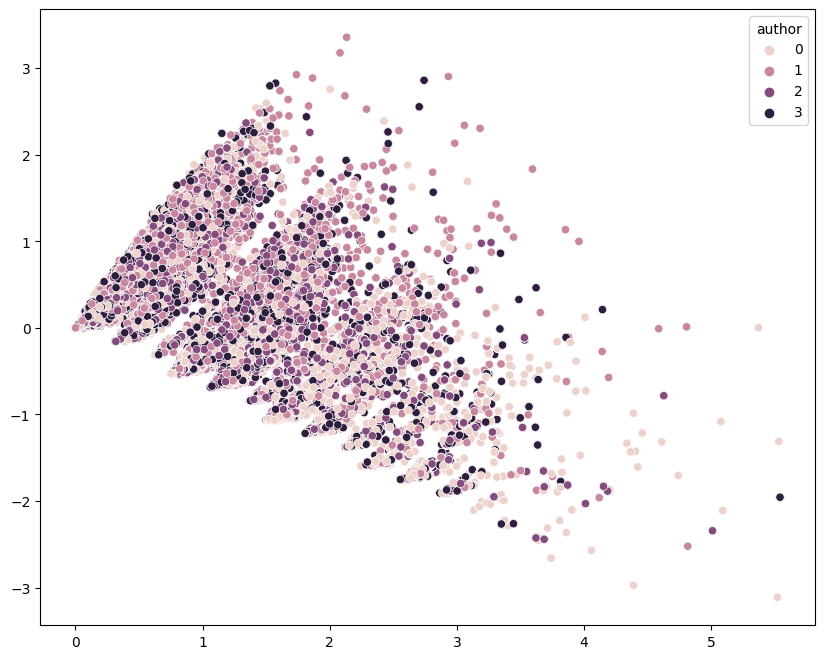

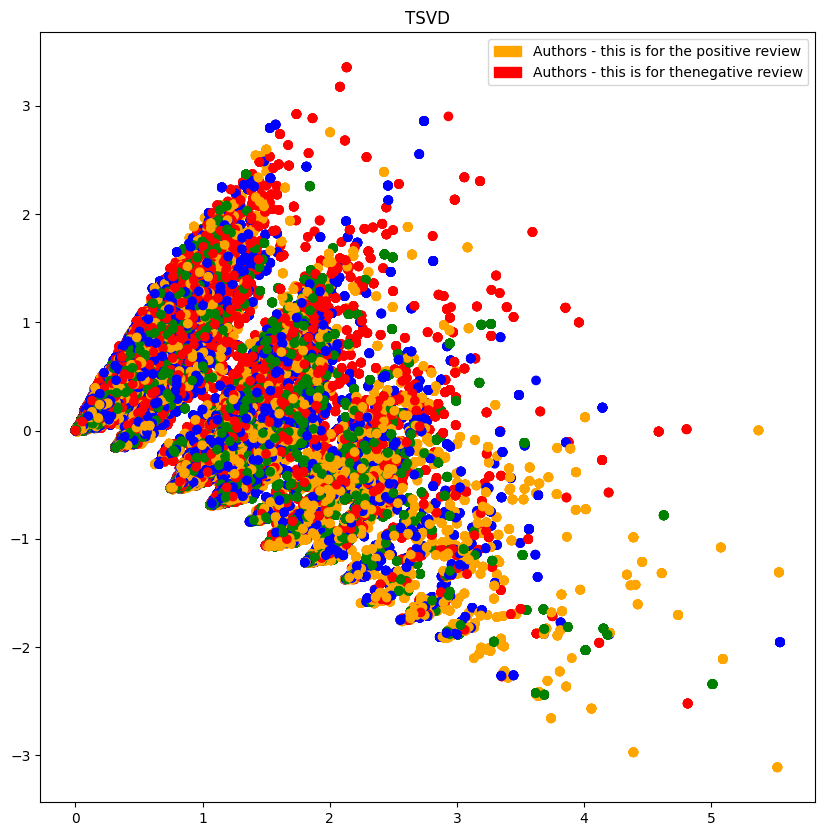

In [62]:
#Count Vectorization
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def vectorize(data):
    cv=CountVectorizer()
    fit_data_cv=cv.fit_transform(data)
    return fit_data_cv,cv

#Tfidf vectorization from sklearn
def tfidf(data):
    tfidfv=TfidfVectorizer()
    fit_data_tfidf=tfidfv.fit_transform(data)
    return fit_data_cv,tfidfv


# reducing the dimesion
# TODO find the labels - which is the authors 

def dimen_reduc_plot(test_data, test_label, option): 
    
    tsvd = TruncatedSVD(n_components=2, algorithm="randomized", random_state=42)
    tsne = TSNE(n_components=2, random_state=42)
    pca = SparsePCA(n_components=2, random_state=42)
    
    if(option==1): 
        
        tsvd_result=tsvd.fit_transform(test_data)
        plt.figure(figsize=(10, 8))
        colors=['orange', 'red', 'green', 'blue']
        
        sns.scatterplot(x=tsvd_result[:,0], y=tsvd_result[:,1], hue=train_data['author']) 
        plt.show()
        plt.figure(figsize=(10, 10)) 
        plt.scatter(tsvd_result[:,0], tsvd_result[:,1], c=test_label, cmap=matplotlib.colors.ListedColormap(colors))
        color_red = mpatches.Patch(color='red', label='Authors - this is for thenegative review')
        color_orange = mpatches.Patch(color='orange', label='Authors - this is for the positive review')
        plt.legend(handles=[color_orange, color_red]) 
        plt.title('TSVD')
        plt.show()
        
    if(option==2): 
        
        tsne_result = tsne.fit_transform(test_data)
        plt.figure(figsize=(10, 8))
        colors=['orange', 'red', 'green']
        sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=train_data['author'])
        plt.show()
        plt.figure(figsize=(10, 10))
        plt.scatter(x=tsne_result[:,0], y=tsne_result[:,1], c=test_label, cmap=matplotlib.colors.ListedColormap(colors))
                   
        color_red=mpathes.Patch(color='red', label='author text 1')
        color_orange=mpatches.Patch(color='orange', label='author text 2')
        plt.legend(handles=[color_orange, color_red])
        plt.title("PCA")
        plt.show() 
                   
    if(option==3):
        
        pca_result =pca.fit_transform(test_data.toarray()) 
        plt.figure(figsize=(10,8))
        colors=['orange', 'red', 'green']
        
        sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=train_data['author'])
        plt.show()
        plt.figure(figsize=(10, 10))
        plt.scatter(x=pca_result[:,0], y=pca_result[:,1], c=test_label, cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red', label='Autthor 1')
        color_orange = mpatches.Patch(color='orange', label='Author 2') 
        plt.legend(handles=[color_orange, color_red]) 
        plt.title("TSNE")
        plt.show()

                   
# test each line of these - text author
# train_data, test_data, train_author, test_author
# test_label is the authors 

train_data = train_data

data_vect = train_data['text'].values 

data_vect_good = train_data[train_data['author'] ==1]['author'].values

#----------------------------------------------

target_vect = train_data['author'].values 

target_data_vect_good = train_data[train_data['author'] == 1]['author'].values

target_data_vect_bad = train_data[train_data['author'] == 2]['author'].values

#----------------------------------------------

train_data_cv, cv = vectorize(data_vect)

real_review_train_data_cv, cv=vectorize(data_vect) 
# real_review_train_data_cv, cv=vectorize(data_vect_good)
            

dimen_reduc_plot(train_data_cv,target_vect,1)

#dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,1)

# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_bad,1)
                   
        
        

In [63]:
check_df = list(data['text'].str.split())

In [64]:
# semantic embedding 
# %%time 
from gensim.models import Word2Vec,KeyedVectors 

model = Word2Vec(check_df, min_count=1)
word_li = list(model.wv.index_to_key) 
print(word_li[:25])
print(model)


['the', 'to', 'and', 'of', 'I', 'a', '.', 'in', 'he', 'that', 'was', 'his', 'you', 'had', 'not', 'her', 'with', 'is', 'my', 'for', 'it', 'at', 'as', 'she', 'on']
Word2Vec<vocab=38300, vector_size=100, alpha=0.025>


In [65]:
model.save('word2vec_model.bin') 
loaded_model = KeyedVectors.load('word2vec_model.bin') 
print(loaded_model)

Word2Vec<vocab=38300, vector_size=100, alpha=0.025>


In [66]:
distance = model.wv.most_similar('that', 'was')
print(distance )

[('amongst,', 0.386104941368103), ('If', 0.38207298517227173), ('certainly', 0.36098191142082214), ('not”!', 0.3599446415901184), ("'How", 0.3548934757709503), ('both', 0.3533450961112976), ('"Why', 0.3532225489616394), ('where', 0.35085493326187134), ("'He", 0.3507811725139618), ("mistress!'", 0.3494032025337219)]


In [67]:
from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model



from tensorflow import keras
from keras.preprocessing.text import Tokenizer
maxlen=1000 
max_features = 5000 
embed_size = 300

train_sample = data['text']

tokenizer = Tokenizer(num_words=max_features)

tokenizer.fit_on_texts(list(train_sample))

train_sample = tokenizer.texts_to_sequences(train_sample)

train_sample = pad_sequences(train_sample, maxlen=maxlen)


EMBEDDING_FILE = "../input/wikinews300d1msubwordvec/wiki-news-300d-1M-subword.vec" 

def get_coefs(word, *arr): return word, np.asanyarray(arr, dtype='float32')

embedding_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o) > 100)


/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


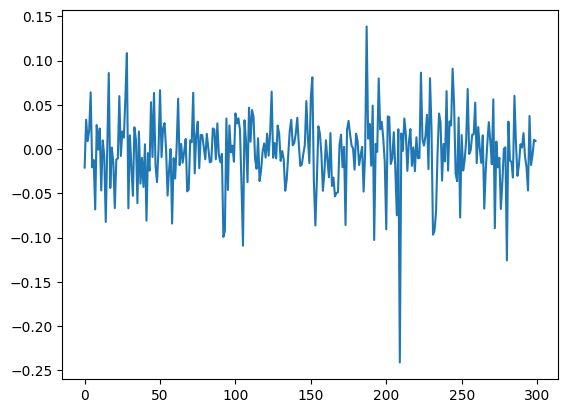

In [68]:
all_embs = np.stack(embedding_index.values())
emb_mean, emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1] 

word_index = tokenizer.word_index 
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

for word, i in word_index.items(): 
    if i>= max_features: continue 
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

plt.plot(embedding_matrix[20])
plt.show()

In [69]:
# train_data, test_data, train_author, test_author
len(train_data), len(test_data), len(train_author), len(test_author)

(320000, 80000, 320000, 80000)

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


texts = data_label_encoded['text']  # List of texts
labels = data_label_encoded['author']  # List of labels

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Define the tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)


X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
maxlen = 1000
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Convert the labels to one-hot encoding
num_classes = len(set(labels))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the CNN architecture for text classification
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=maxlen),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalMaxPooling1D(),
    Dense(units=num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 16
epochs = 1
model.fit(X_train, y_train, batch_size=batch_size, epochs=1, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5000/5000 [==============================] - 86s 17ms/step - loss: 0.1342 - accuracy: 0.9493
Test loss: 0.13423240184783936
Test accuracy: 0.9493499994277954
